In [1]:
import pandas as pd
import numpy as np
import glob
import datetime as dt
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

In [14]:
def load_scws(rid):
    
    df1 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/points/"+rid+"_scw_envs_df.csv")
    df1 = df1.set_index(pd.DatetimeIndex(df1.dt_utc))
    df1["cluster_new"] = df1.cluster.map({1:2,2:1,0:0})    
    df1["month"] = df1.index.month
    df1["hour"] = df1.index.hour
    df1["rid"] = rid
    df1["wgr"] = df1.gust / df1.speed
    maps = {"2":"Melbourne","66":"Brisbane","69":"Namoi","70":"Perth","71":"Sydney"}
    df1["location"] = df1.rid.map(maps)
    return df1

melb = load_scws("2")
bris = load_scws("66")
namoi = load_scws("69")
perth = load_scws("70")
syd = load_scws("71")
df = pd.concat([melb,perth,syd,namoi,bris],axis=0)

          Umean06     speed
Umean06  1.000000  0.459201
speed    0.459201  1.000000
          Umean06     speed
Umean06  1.000000  0.622883
speed    0.622883  1.000000
          Umean06     speed
Umean06  1.000000  0.451227
speed    0.451227  1.000000
          Umean06     speed
Umean06  1.000000  0.299928
speed    0.299928  1.000000
Storm motion...is largely dictated by the mean environmental wind in single cell or multicell thunderstorms;
 in supercells,pressure perturbations owing to environmental vertical wind shear also play a considerable role in controlling storm motion (Sherb 2021)


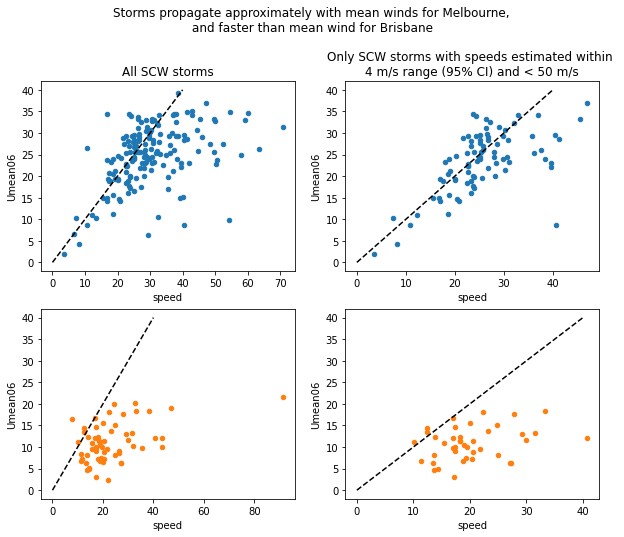

In [3]:
plt.figure(figsize=[10,8])

ax=plt.subplot(2,2,1)
melb.plot(kind="scatter",y="Umean06",x="speed",ax=ax)
plt.plot([0,40],[0,40],color="k",ls="--")
print(melb[["Umean06","speed"]].corr(method="pearson"))
plt.title("All SCW storms")

ax=plt.subplot(2,2,2)
melb.query("(speed_rnge<4) & (speed<50)").plot(kind="scatter",y="Umean06",x="speed",ax=ax)
plt.plot([0,40],[0,40],color="k",ls="--")
print(melb.query("(speed_rnge<4) & (speed<50)")[["Umean06","speed"]].corr(method="pearson"))
plt.title("Only SCW storms with speeds estimated within \n4 m/s range (95% CI) and < 50 m/s")
    
ax=plt.subplot(2,2,3)
bris.plot(kind="scatter",y="Umean06",x="speed",color="tab:orange",ax=ax)
plt.plot([0,40],[0,40],color="k",ls="--")
print(bris[["Umean06","speed"]].corr(method="pearson"))

ax=plt.subplot(2,2,4)
bris.query("(speed_rnge<4) & (speed<50)").plot(kind="scatter",y="Umean06",x="speed",color="tab:orange",ax=ax)
plt.plot([0,40],[0,40],color="k",ls="--")
print(bris.query("(speed_rnge<4) & (speed<50)")[["Umean06","speed"]].corr(method="pearson"))

plt.suptitle("Storms propagate approximately with mean winds for Melbourne,\n and faster than mean wind for Brisbane")
plt.subplots_adjust(top=0.85)

print("Storm motion...is largely dictated by the mean environmental wind in single cell or multicell thunderstorms;\n in supercells,\
pressure perturbations owing to environmental vertical wind shear also play a considerable role in controlling storm motion (Sherb 2021)")

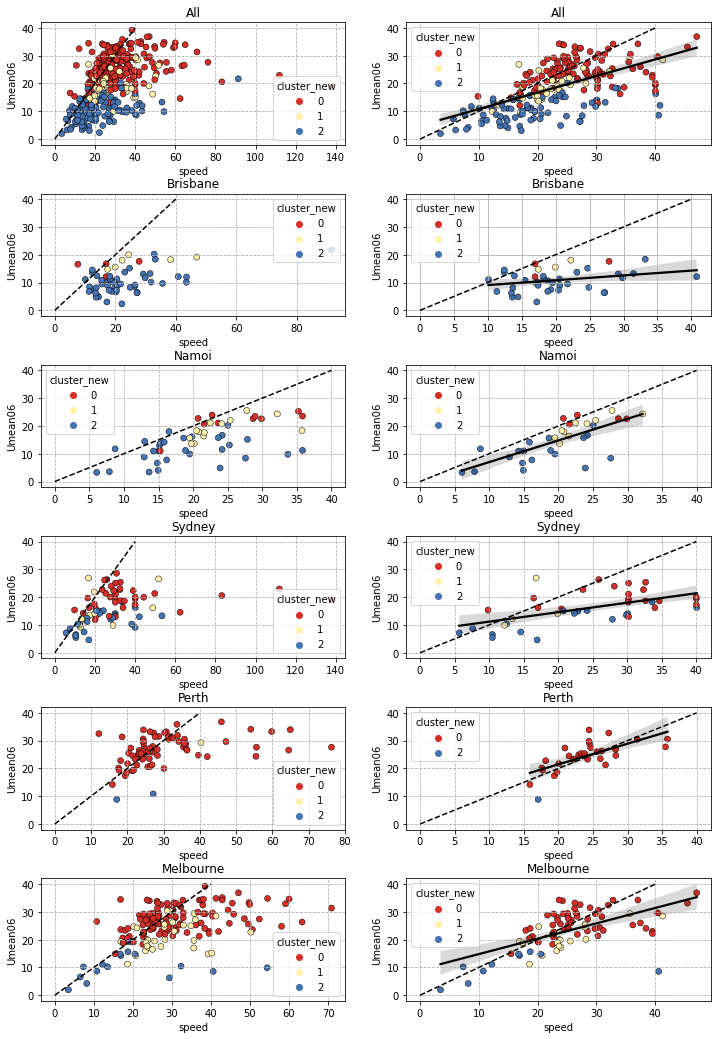

In [8]:
plt.figure(figsize=[12,18])

p = [plt.get_cmap("RdYlBu")(i) for i in [0.1,0.46,0.9]]

ax=plt.subplot(6,2,1)
sns.scatterplot(data=df,x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("All")

ax=plt.subplot(6,2,2)
sns.scatterplot(data=df.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=df.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",scatter=False,ax=ax,color="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("All")

ax=plt.subplot(6,2,3)
sns.scatterplot(data=bris,x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("Brisbane")

ax=plt.subplot(6,2,4)
sns.scatterplot(data=bris.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=bris.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",scatter=False,ax=ax,color="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid()
plt.title("Brisbane")

ax=plt.subplot(6,2,5)
sns.scatterplot(data=namoi,x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("Namoi")

ax=plt.subplot(6,2,6)
sns.scatterplot(data=namoi.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=namoi.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",scatter=False,ax=ax,color="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("Namoi")

ax=plt.subplot(6,2,7)
sns.scatterplot(data=syd,x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("Sydney")

ax=plt.subplot(6,2,8)
sns.scatterplot(data=syd.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=syd.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",scatter=False,ax=ax,color="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("Sydney")

ax=plt.subplot(6,2,9)
sns.scatterplot(data=perth,x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("Perth")

ax=plt.subplot(6,2,10)
sns.scatterplot(data=perth.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=[p[0],p[2]],edgecolor="k")
sns.regplot(data=perth.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",scatter=False,ax=ax,color="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("Perth")

ax=plt.subplot(6,2,11)
sns.scatterplot(data=melb,x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("Melbourne")

ax=plt.subplot(6,2,12)
sns.scatterplot(data=melb.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=melb.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",scatter=False,ax=ax,color="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("Melbourne")

plt.subplots_adjust(hspace=0.4)



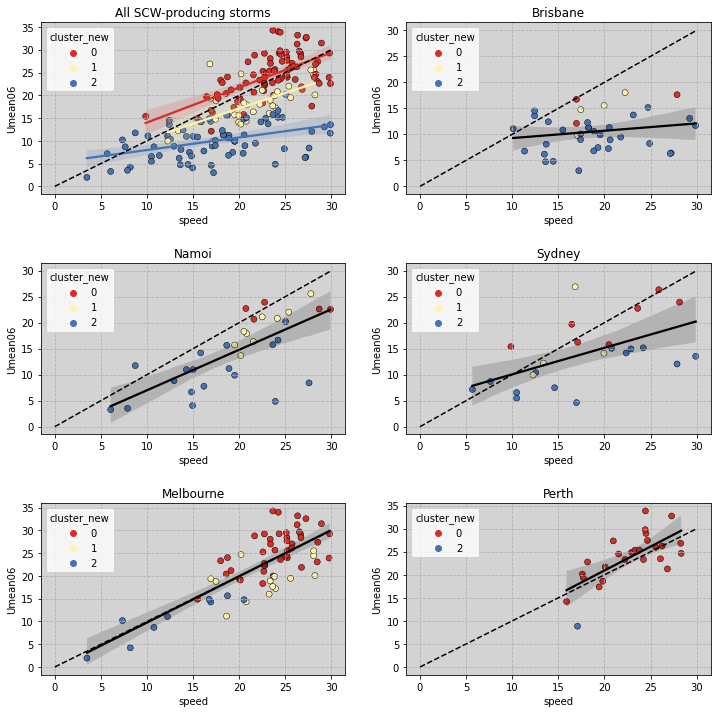

In [174]:
plt.figure(figsize=[12,12])

p = [plt.get_cmap("RdYlBu")(i) for i in [0.1,0.46,0.9]]

ax=plt.subplot(3,2,1)
sns.scatterplot(data=df.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=df.query("(speed_rnge<4) & (speed<30) & (cluster_new==0)"),x="speed",y="Umean06",scatter=False,color=p[0],ax=ax)
sns.regplot(data=df.query("(speed_rnge<4) & (speed<30) & (cluster_new==1)"),x="speed",y="Umean06",scatter=False,color=p[1],ax=ax)
sns.regplot(data=df.query("(speed_rnge<4) & (speed<30) & (cluster_new==2)"),x="speed",y="Umean06",scatter=False,color=p[2],ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,30],[0,30],color="k",ls="--")
ax.grid(ls="--")
plt.title("All SCW-producing storms")

ax=plt.subplot(3,2,2)
sns.scatterplot(data=bris.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=bris.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",scatter=False,color="k",ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,30],[0,30],color="k",ls="--")
ax.grid(ls="--")
plt.title("Brisbane")

ax=plt.subplot(3,2,3)
sns.scatterplot(data=namoi.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=namoi.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",scatter=False,color="k",ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,30],[0,30],color="k",ls="--")
ax.grid(ls="--")
plt.title("Namoi")

ax=plt.subplot(3,2,4)
sns.scatterplot(data=syd.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=syd.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",scatter=False,color="k",ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,30],[0,30],color="k",ls="--")
ax.grid(ls="--")
plt.title("Sydney")

ax=plt.subplot(3,2,5)
sns.scatterplot(data=melb.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=melb.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",scatter=False,color="k",ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,30],[0,30],color="k",ls="--")
ax.grid(ls="--")
plt.title("Melbourne")

ax=plt.subplot(3,2,6)
sns.scatterplot(data=perth.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=[p[0],p[2]],edgecolor="k")
sns.regplot(data=perth.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",scatter=False,color="k",ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,30],[0,30],color="k",ls="--")
ax.grid(ls="--")
plt.title("Perth")

plt.subplots_adjust(hspace=0.4)
plt.savefig("/g/data/eg3/ab4502/figs/ExtremeWind/scws_speed_plot.jpeg",dpi=1000,bbox_inches="tight")

Text(0.5, 1.0, 'SCW-producing storms < 30 m/s\n and 95% confidence range < 4 m/s')

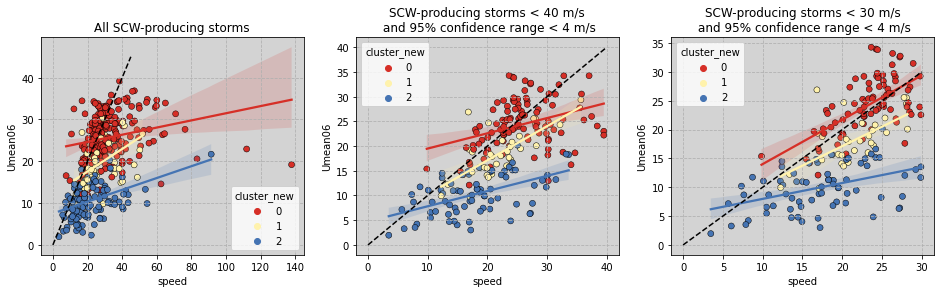

In [162]:
plt.figure(figsize=[16,4])

p = [plt.get_cmap("RdYlBu")(i) for i in [0.1,0.46,0.9]]

ax=plt.subplot(1,3,1)
sns.scatterplot(data=df,x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=df.query("cluster_new==0"),x="speed",y="Umean06",scatter=False,color=p[0],ax=ax)
sns.regplot(data=df.query("cluster_new==1"),x="speed",y="Umean06",scatter=False,color=p[1],ax=ax)
sns.regplot(data=df.query("cluster_new==2"),x="speed",y="Umean06",scatter=False,color=p[2],ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,45],[0,45],color="k",ls="--")
ax.grid(ls="--")
plt.title("All SCW-producing storms")

ax=plt.subplot(1,3,2)
sns.scatterplot(data=df.query("(speed_rnge<4) & (speed<40)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=df.query("(speed_rnge<4) & (speed<40) & (cluster_new==0)"),x="speed",y="Umean06",scatter=False,color=p[0],ax=ax)
sns.regplot(data=df.query("(speed_rnge<4) & (speed<40) & (cluster_new==1)"),x="speed",y="Umean06",scatter=False,color=p[1],ax=ax)
sns.regplot(data=df.query("(speed_rnge<4) & (speed<40) & (cluster_new==2)"),x="speed",y="Umean06",scatter=False,color=p[2],ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("SCW-producing storms < 40 m/s\n and 95% confidence range < 4 m/s")

ax=plt.subplot(1,3,3)
sns.scatterplot(data=df.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=df.query("(speed_rnge<4) & (speed<30) & (cluster_new==0)"),x="speed",y="Umean06",scatter=False,color=p[0],ax=ax)
sns.regplot(data=df.query("(speed_rnge<4) & (speed<30) & (cluster_new==1)"),x="speed",y="Umean06",scatter=False,color=p[1],ax=ax)
sns.regplot(data=df.query("(speed_rnge<4) & (speed<30) & (cluster_new==2)"),x="speed",y="Umean06",scatter=False,color=p[2],ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,30],[0,30],color="k",ls="--")
ax.grid(ls="--")
plt.title("SCW-producing storms < 30 m/s\n and 95% confidence range < 4 m/s")

Wind gust ratios (measured gust / storm speed) - note only speeds 
estimated within 4 m/s (95% CI) and less than 50 m/s are used

Sherburn (2021) winter - 1.02, 1.20, 1.48
Sherburn (2021) summer - 1.28, 1.58, 2.03



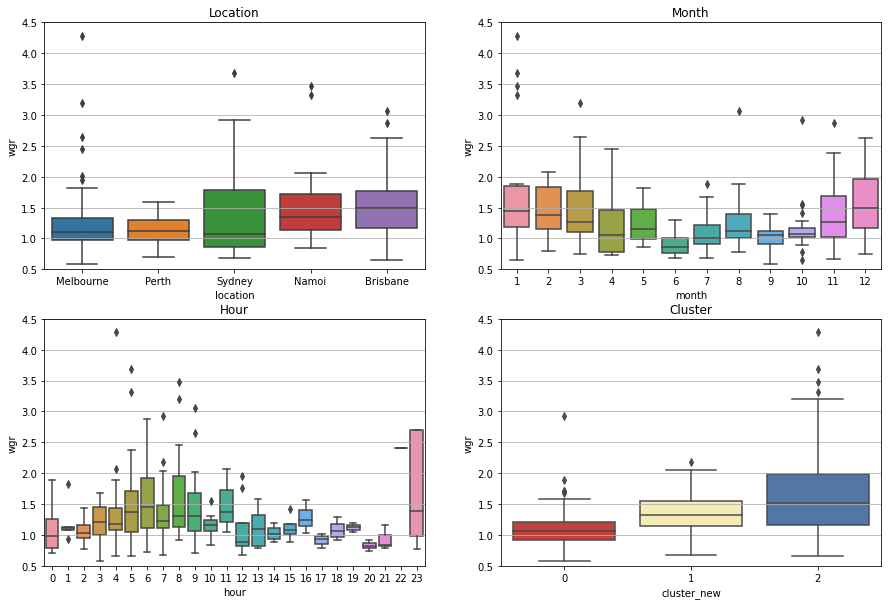

In [15]:
#Wind gust ratios (Sherburn 2021). Note that we are using thunderstorm speed here, rather than outflow speed

plt.figure(figsize=[15,10])

ax=plt.subplot(2,2,1)
sns.boxplot(data=df.query("(speed_rnge<4) & (speed<50)"),x="location",y="wgr")
plt.ylim([0.5,4.5])
plt.title("Location")
ax.grid(axis="y")

ax=plt.subplot(2,2,2)
sns.boxplot(data=df.query("(speed_rnge<4) & (speed<50)"),x="month",y="wgr",)
plt.ylim([0.5,4.5])
plt.title("Month")
ax.grid(axis="y")

ax=plt.subplot(2,2,3)
sns.boxplot(data=df.query("(speed_rnge<4) & (speed<50)"),x="hour",y="wgr",)
plt.ylim([0.5,4.5])
plt.title("Hour")
ax.grid(axis="y")

ax=plt.subplot(2,2,4)
sns.boxplot(data=df.query("(speed_rnge<4) & (speed<50)"),x="cluster_new",y="wgr",palette=p)
plt.ylim([0.5,4.5])
plt.title("Cluster")
ax.grid(axis="y")

print("Wind gust ratios (measured gust / storm speed) - note only speeds \nestimated within 4 m/s (95% CI) and less than 50 m/s are used\n")


print("Sherburn (2021) winter - 1.02, 1.20, 1.48")
print("Sherburn (2021) summer - 1.28, 1.58, 2.03\n")

plt.savefig("/g/data/eg3/ab4502/figs/ExtremeWind/scws_wgr.jpeg",dpi=1000,bbox_inches="tight")

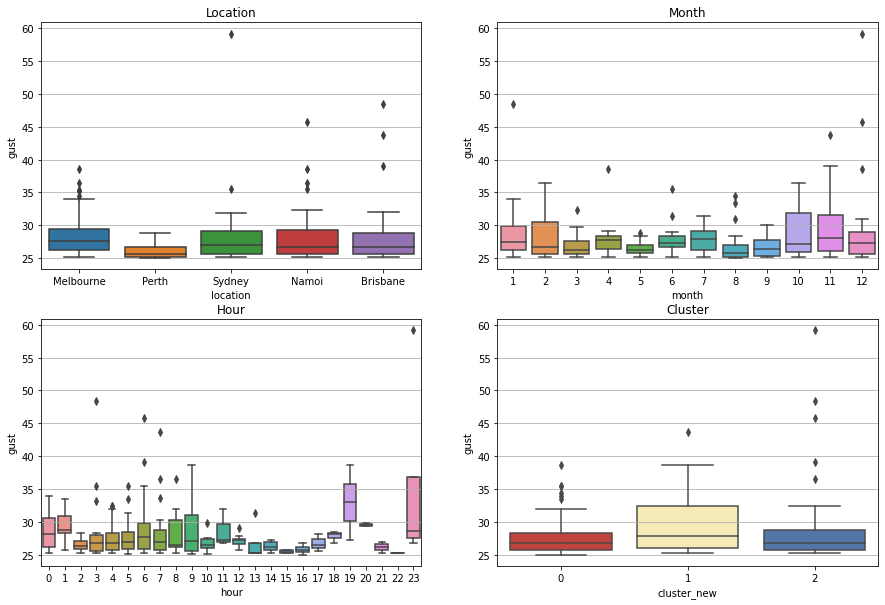

In [112]:
#Wind gust ratios (Sherburn 2021). Note that we are using thunderstorm speed here, rather than outflow speed

plt.figure(figsize=[15,10])

ax=plt.subplot(2,2,1)
sns.boxplot(data=df.query("(speed_rnge<4) & (speed<50)"),x="location",y="gust")
plt.title("Location")
ax.grid(axis="y")

ax=plt.subplot(2,2,2)
sns.boxplot(data=df.query("(speed_rnge<4) & (speed<50)"),x="month",y="gust",)
plt.title("Month")
ax.grid(axis="y")

ax=plt.subplot(2,2,3)
sns.boxplot(data=df.query("(speed_rnge<4) & (speed<50)"),x="hour",y="gust",)
plt.title("Hour")
ax.grid(axis="y")

ax=plt.subplot(2,2,4)
sns.boxplot(data=df.query("(speed_rnge<4) & (speed<50)"),x="cluster_new",y="gust",palette=p)
plt.title("Cluster")
ax.grid(axis="y")

plt.savefig("/g/data/eg3/ab4502/figs/ExtremeWind/scws_gust_dist.jpeg",dpi=1000,bbox_inches="tight")

In [172]:
syd.query("(speed_rnge<4) & (speed<30)")

,Unnamed: 0,dt_utc,group_id,scan,uid10,dist0km,dist10km,dist20km,in10km,stn_id,...,cluster,bdsd,rolling4,wgr_4,cluster_new,month,hour,rid,wgr,location
dt_utc,,,,,,,,,,,,,,,,,,,,,
2010-08-02 17:13:00,22713,2010-08-02 17:13:00,20100802171302/470,386.0,469.0,40.708,8.535,8.535,1.0,61366,...,0,0.795081,17.263750,1.535008,0,8,17,71,1.023640,Sydney
2011-07-20 00:16:00,624569,2011-07-20 00:16:00,20110720001303/1089,4562.0,1089.0,0.446,0.446,0.446,1.0,61366,...,0,0.965529,18.407884,1.684061,0,7,0,71,1.883926,Sydney
2011-07-21 07:08:00,669022,2011-07-21 07:08:00,20110721070710/2079,4871.0,2079.0,0.375,0.375,0.375,1.0,66208,...,1,0.484181,15.258921,1.684261,2,7,7,71,0.859877,Sydney
2012-03-07 13:42:00,185072,2012-03-07 13:42:00,20120307133705/2278,1272.0,2278.0,0.375,0.375,0.375,1.0,66208,...,1,0.973463,11.054357,2.279644,2,3,13,71,1.101736,Sydney
2012-03-07 23:32:00,199244,2012-03-07 23:32:00,20120307233105/2784,1371.0,2784.0,0.375,0.375,15.936,1.0,66208,...,0,0.659037,18.528936,1.581310,0,3,23,71,1.714453,Sydney
2012-11-08 05:15:00,183243,2012-11-08 05:15:00,20121108051304/561,1285.0,561.0,0.238,0.238,0.238,1.0,67113,...,1,0.961019,5.124167,5.835095,2,11,5,71,2.383610,Sydney
2013-10-17 04:33:00,570188,2013-10-17 04:33:00,20131017043104/1372,3790.0,1372.0,0.217,0.217,0.217,1.0,66137,...,2,0.943013,14.224615,1.841878,1,10,4,71,1.557947,Sydney
2014-03-15 06:37:00,471119,2014-03-15 06:37:00,20140315063705/2128,3378.0,2131.0,0.503,6.862,6.862,1.0,66022,...,1,0.980448,5.581328,4.515055,2,3,6,71,0.904295,Sydney
2014-10-14 07:56:00,449955,2014-10-14 07:56:00,20141014075503/828,3122.0,828.0,1.762,1.762,1.762,1.0,68228,...,0,0.819650,16.514523,1.743920,0,10,7,71,2.923264,Sydney


<Figure size 432x288 with 0 Axes>

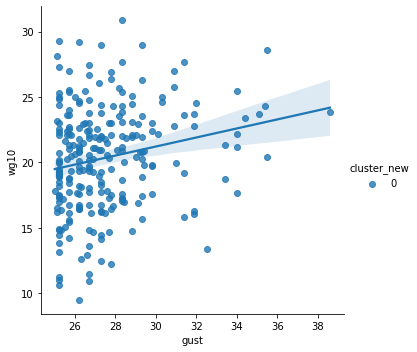

<Figure size 432x288 with 0 Axes>

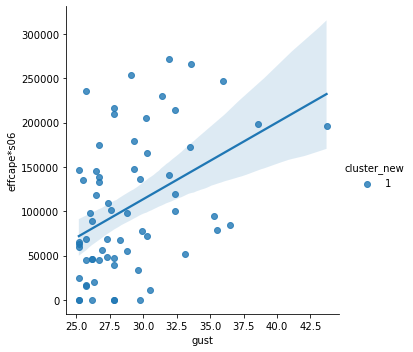

<Figure size 432x288 with 0 Axes>

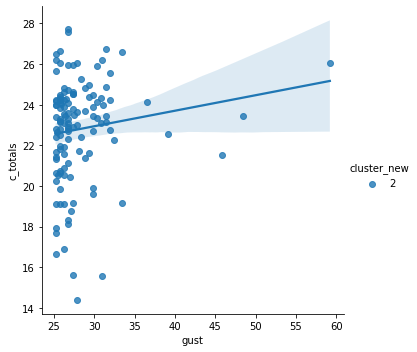

In [108]:
plt.figure();sns.lmplot(data=df.query("cluster_new==0"),x="gust",y="wg10",hue="cluster_new")
plt.figure();sns.lmplot(data=df.query("cluster_new==1"),x="gust",y="effcape*s06",hue="cluster_new")
plt.figure();sns.lmplot(data=df.query("cluster_new==2"),x="gust",y="c_totals",hue="cluster_new")

<AxesSubplot:xlabel='gust', ylabel='Probability'>

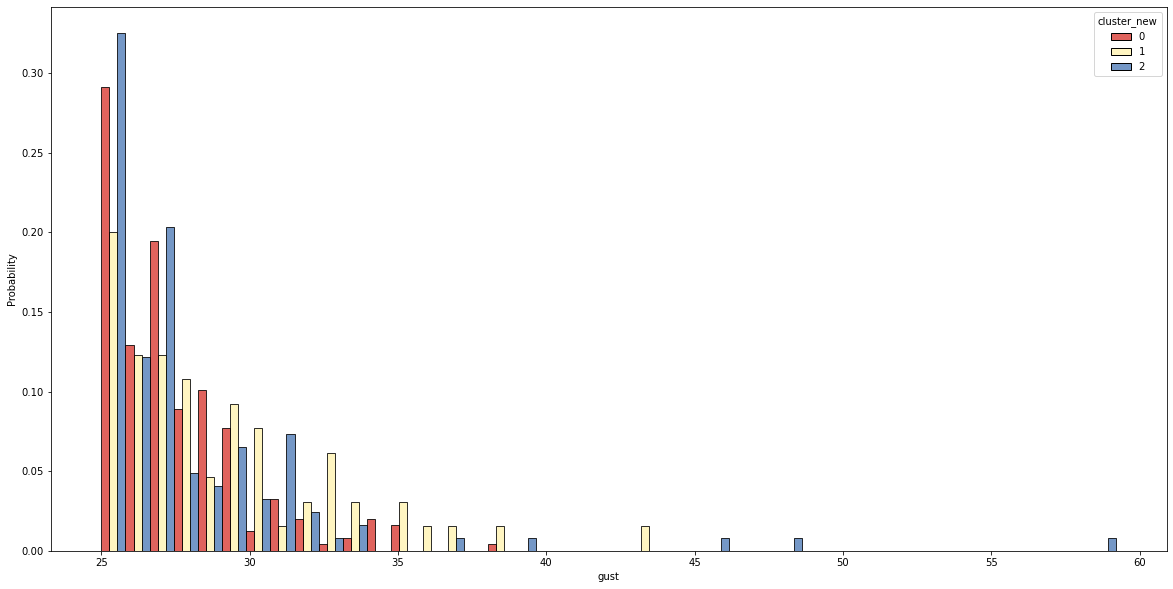

In [127]:
plt.figure(figsize=[20,10])
sns.histplot(data=df,x="gust",hue="cluster_new",multiple="dodge",common_norm=False,stat="probability",palette=[plt.get_cmap("RdYlBu")(i) for i in [0.1,0.46,0.9]])